# Tutorial 4: Inspecting predicted fluxes

In this tutorial we will load and inspect the fluxes predicted by the _Bacillus subtilis_ ME-model.

## Import libraries

In [1]:
from coralme.builder.main import MEBuilder
from coralme.util.flux_analysis import flux_based_reactions
import coralme
import pandas
import tqdm

## Load

Load the ME-model coming out of the Troubleshooter

In [2]:
me = coralme.io.json.load_json_me_model("MEModel-step3-bsubtilis-TS.json")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-16


Adding Metabolites into the ME-model...                                    : 100.0%|██████████|  4631/ 4631 [00:00<00:00]
Adding ProcessData into the ME-model...                                    : 100.0%|██████████|  4754/ 4754 [00:00<00:00]
Adding Reactions into the ME-model...                                      : 100.0%|██████████|  7759/ 7759 [00:17<00:00]
Updating ME-model Reactions...                                             : 100.0%|██████████|  6328/ 6328 [00:18<00:00]


## Solve

In [3]:
me.optimize()

The MINOS and quad MINOS solvers are a courtesy of Prof Michael A. Saunders. Please cite Ma, D., Yang, L., Fleming, R. et al. Reliable and efficient solution of genome-scale models of Metabolism and macromolecular Expression. Sci Rep 7, 40863 (2017). https://doi.org/10.1038/srep40863

Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	1.4050280687025918	Not feasible
        2	0.7025140343512959	Not feasible
        3	0.3512570171756479	Not feasible
        4	0.1756285085878240	Optimal
        5	0.2634427628817360	Not feasible
        6	0.2195356357347800	Not feasible
        7	0.1975820721613020	Not feasible
        8	0.1866052903745630	Not feasible
        9	0.1811168994811935	Not feasible
       10	0.1783727040345087	Not feasible
       11	0.1770006063111663	Not feasible
       12	0.1763145574494951	Optimal
       13	0.1766575818803308	Optimal
       14	0.1768290940957485	Optimal
       15	0.1769148502034574	Not feasible
       16	0.176871

True

## Inspecting fluxes

### Predicted fluxes

In [4]:
fluxes = me.solution.to_frame()
fluxes

,fluxes,reduced_costs
biomass_dilution,1.768485e-01,-5.444926e-01
BSU15140-MONOMER_to_generic_16Sm4Cm1402,5.195407e-12,6.992884e-34
RNA_BSU_rRNA_1_to_generic_16s_rRNAs,3.189054e-06,0.000000e+00
RNA_BSU_rRNA_16_to_generic_16s_rRNAs,0.000000e+00,-6.036148e-02
RNA_BSU_rRNA_19_to_generic_16s_rRNAs,9.834132e-07,0.000000e+00
...,...,...
translocation_BSU25290_Plasma_Membrane,1.039081e-11,-6.745283e-34
translocation_BSU27650_Plasma_Membrane,2.050627e-06,-1.086612e-33
translocation_BSU33630_Plasma_Membrane,2.073834e-06,0.000000e+00
translocation_BSU35300_Plasma_Membrane,2.052823e-06,3.194193e-34


### Biomass production

In [5]:
fluxes[fluxes.index.str.contains("biomass")]

,fluxes,reduced_costs
biomass_dilution,0.176849,-5.444926e-01
protein_biomass_to_biomass,0.060190,-1.326275e-34
mRNA_biomass_to_biomass,0.000229,-8.580748e-35
tRNA_biomass_to_biomass,0.001386,-7.386542e-35
rRNA_biomass_to_biomass,0.010071,0.000000e+00
ncRNA_biomass_to_biomass,0.000000,0.000000e+00
tmRNA_biomass_to_biomass,0.000000,0.000000e+00
DNA_biomass_to_biomass,0.010423,0.000000e+00
lipid_biomass_to_biomass,0.040654,0.000000e+00
constituent_biomass_to_biomass,0.019977,0.000000e+00


### Transcription rates

In [6]:
fluxes[fluxes.index.str.contains("^transcription_")].head()

,fluxes,reduced_costs
transcription_TU8J2-1243_from_BSU25200-MONOMER,0.000000e+00,2.756459e-32
transcription_TU8J2-569_from_BSU25200-MONOMER,2.279894e-08,-4.328676e-32
transcription_TU8J2-1577_from_BSU25200-MONOMER,0.000000e+00,-2.262374e+02
transcription_TU8J2-257_from_BSU25200-MONOMER,0.000000e+00,-7.107130e-32
transcription_TU8J2-677_from_BSU25200-MONOMER,3.368758e-08,2.637905e-32


### Translation rates

In [7]:
fluxes[fluxes.index.str.contains("^translation_")].head()

,fluxes,reduced_costs
translation_BSU00090,4.343633e-08,1.923905e-32
translation_BSU00110,3.346013e-12,-2.831928e-33
translation_BSU00120,3.346013e-12,-4.908347e-33
translation_BSU00130,6.964087e-08,1.372621e-31
translation_BSU00140,1.895093e-10,6.594385e-33


## Biomass profile

We can calculate the predicted biomass composition in this condition by using _flux_based_reactions_ which outputs the mass balance of a metabolite

In [8]:
flux_based_reactions(me,"biomass")

,lb,ub,rxn_flux,met_flux,reaction
biomass_dilution,mu1,mu1,0.176849,-0.176849,1.0 biomass -->
protein_biomass_to_biomass,0.0,1000.0,0.060190,0.094047,1.0 protein_biomass + 0.5625 unmodeled_protein...
lipid_biomass_to_biomass,0.0,1000.0,0.040654,0.040654,1.0 lipid_biomass --> 1.0 biomass
constituent_biomass_to_biomass,0.0,1000.0,0.019977,0.019977,1.0 constituent_biomass --> 1.0 biomass
DNA_biomass_to_biomass,0.0,1000.0,0.010423,0.010423,1.0 DNA_biomass --> 1.0 biomass
rRNA_biomass_to_biomass,0.0,1000.0,0.010071,0.010071,1.0 rRNA_biomass --> 1.0 biomass
tRNA_biomass_to_biomass,0.0,1000.0,0.001386,0.001386,1.0 tRNA_biomass --> 1.0 biomass
mRNA_biomass_to_biomass,0.0,1000.0,0.000229,0.000229,1.0 mRNA_biomass --> 1.0 biomass
prosthetic_group_biomass_to_biomass,0.0,1000.0,0.000061,0.000061,1.0 prosthetic_group_biomass --> 1.0 biomass
tmRNA_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 tmRNA_biomass --> 1.0 biomass


<Axes: ylabel='met_flux'>

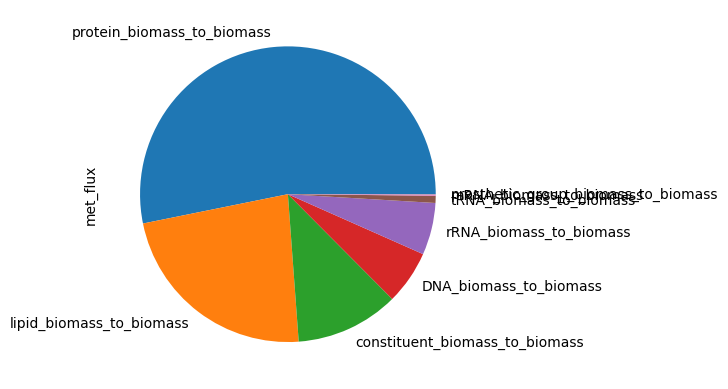

In [9]:
tmp = flux_based_reactions(me,"biomass")["met_flux"]
BiomassComponents = tmp[tmp>0]
BiomassComponents.plot.pie()